In [54]:
import matplotlib.pyplot as plt

def plot_eda_charts(df, title_suffix=""):
    # Precompute counts
    dx_counts   = df['dx'].value_counts()
    loc_counts  = df['localization'].value_counts()
    sex_counts  = df['sex'].value_counts()
    age_series  = df['age'].dropna()

    fig, axes = plt.subplots(2, 2, figsize=(20, 12))

    # 1. Diagnostic Categories (dx) – pie with labels moved out
    dx_counts.plot.pie(
        ax=axes[0, 0],
        autopct='%1.1f%%',
        pctdistance=0.75,      # % text closer to edge
        labeldistance=1.15,    # labels farther out
        startangle=90,
        textprops={'fontsize': 8}
    )
    axes[0, 0].set_ylabel("")
    axes[0, 0].set_title(f"Diagnostic Categories {title_suffix}", fontsize=14)

    # Legend for Diagnostic Categories (same style as Localization)
    axes[0, 0].legend(
    dx_counts.index,
    title="Diagnostic Categories",
    loc='center left',
    bbox_to_anchor=(1.15, 0.5),
    fontsize=9
    )

    # 2. Localization – pie with legend (no labels on wedges)
    loc_counts.plot.pie(
        ax=axes[0, 1],
        autopct='%1.1f%%',
        pctdistance=0.8,
        startangle=90,
        textprops={'fontsize': 7}
    )
    axes[0, 1].set_ylabel("")
    axes[0, 1].set_title(f"Localization Distribution {title_suffix}", fontsize=14)

    # Legend for localization
    axes[0, 1].legend(
        loc_counts.index,
        title="Localization",
        loc='center left',
        bbox_to_anchor=(1.05, 0.5),
        fontsize=9
    )

    # 3. Age Histogram
    axes[1, 0].hist(
        age_series,
        bins=20,
        edgecolor="black"
    )
    axes[1, 0].set_title(f"Age Distribution {title_suffix}", fontsize=14)
    axes[1, 0].set_xlabel("Age", fontsize=12)
    axes[1, 0].set_ylabel("Count", fontsize=12)

    # 4. Sex Distribution – pie with labels moved out
    sex_counts.plot.pie(
        ax=axes[1, 1],
        autopct='%1.1f%%',
        pctdistance=0.75,
        labeldistance=1.15,
        startangle=90,
        textprops={'fontsize': 9}
    )
    axes[1, 1].set_ylabel("")
    axes[1, 1].set_title(f"Sex Distribution {title_suffix}", fontsize=14)

    plt.tight_layout()
    plt.show()

    return fig, axes



In [55]:
# Allow multiple df print-outs within a single code block
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [56]:
try:
    from datasets import load_dataset
except:
    !pip install datasets
    from datasets import load_dataset

# Load dataset
skin_cancer_ds = load_dataset("marmal88/skin_cancer")

# Print structure
print(skin_cancer_ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization'],
        num_rows: 9577
    })
    validation: Dataset({
        features: ['image', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization'],
        num_rows: 2492
    })
    test: Dataset({
        features: ['image', 'image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization'],
        num_rows: 1285
    })
})


In [57]:
import pandas as pd

# Convert each split to pandas DataFrame
skin_train_df = skin_cancer_ds["train"].to_pandas()
skin_valid_df = skin_cancer_ds["validation"].to_pandas()
skin_test_df = skin_cancer_ds["test"].to_pandas()

# Merge train and validation splits
skin_df = pd.concat((skin_train_df, skin_valid_df), axis=0)

skin_df.head()
skin_test_df.head()

image      image_id  \
0  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024329   
1  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024372   
2  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024418   
3  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024450   
4  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024463   

     lesion_id                 dx dx_type   age     sex     localization  
0  HAM_0002954  actinic_keratoses   histo  75.0  female  lower extremity  
1  HAM_0005389  actinic_keratoses   histo  70.0    male  lower extremity  
2  HAM_0003380  actinic_keratoses   histo  75.0  female  lower extremity  
3  HAM_0005505  actinic_keratoses   histo  50.0    male  upper extremity  
4  HAM_0004568  actinic_keratoses   histo  50.0    male  upper extremity

image      image_id  \
0  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024329   
1  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024654   
2  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024707   
3  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0024763   
4  {'bytes': b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\...  ISIC_0025539   

     lesion_id                 dx dx_type   age     sex     localization  
0  HAM_0002954  actinic_keratoses   histo  75.0  female  lower extremity  
1  HAM_0005705  actinic_keratoses   histo  75.0  female  lower extremity  
2  HAM_0005448  actinic_keratoses   histo  60.0    male             face  
3  HAM_0006524  actinic_keratoses   histo  65.0    male              ear  
4  HAM_0000967  actinic_keratoses   histo  75.0    male  lower extremity

In [58]:
# Images are stored as bytes within dictionary, so extract them so hashable to check for duplicates and null values
def extract_bytes(dict_object):
    return dict_object["bytes"]

# Apply
skin_df["image"] = skin_df["image"].apply(extract_bytes)

# Check
skin_df.head()

image      image_id  \
0  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024329   
1  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024372   
2  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024418   
3  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024450   
4  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024463   

     lesion_id                 dx dx_type   age     sex     localization  
0  HAM_0002954  actinic_keratoses   histo  75.0  female  lower extremity  
1  HAM_0005389  actinic_keratoses   histo  70.0    male  lower extremity  
2  HAM_0003380  actinic_keratoses   histo  75.0  female  lower extremity  
3  HAM_0005505  actinic_keratoses   histo  50.0    male  upper extremity  
4  HAM_0004568  actinic_keratoses   histo  50.0    male  upper extremity

In [59]:
# Basic cleaning
skin_df = skin_df.dropna()
skin_df = skin_df.drop_duplicates()

# Check
print(len(skin_df))

9907


In [60]:
print("BEFORE TRIM: Structure")
print(skin_df.info())
print(skin_df.head())

print("BEFORE TRIM: Missing Values")
print(skin_df.isna().sum())

print("BEFORE TRIM: dx Distribution")
print(skin_df['dx'].value_counts())

print("BEFORE TRIM: Sex Distribution")
print(skin_df['sex'].value_counts())

print("BEFORE TRIM: Localization Distribution")
print(skin_df['localization'].value_counts())

print("BEFORE TRIM: Age Statistics")
print(skin_df['age'].describe())

print("BEFORE TRIM: Duplicate Images")
print(skin_df['image'].duplicated().sum())

print("BEFORE TRIM: Null Images")
print(skin_df['image'].isna().sum())



BEFORE TRIM: Structure
<class 'pandas.core.frame.DataFrame'>
Index: 9907 entries, 0 to 2491
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         9907 non-null   object 
 1   image_id      9907 non-null   object 
 2   lesion_id     9907 non-null   object 
 3   dx            9907 non-null   object 
 4   dx_type       9907 non-null   object 
 5   age           9907 non-null   float64
 6   sex           9907 non-null   object 
 7   localization  9907 non-null   object 
dtypes: float64(1), object(7)
memory usage: 696.6+ KB
None
                                               image      image_id  \
0  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024329   
1  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024372   
2  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024418   
3  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024450   
4  b'\xff\xd8\xff\xdb\x00C\x00\x01\x0

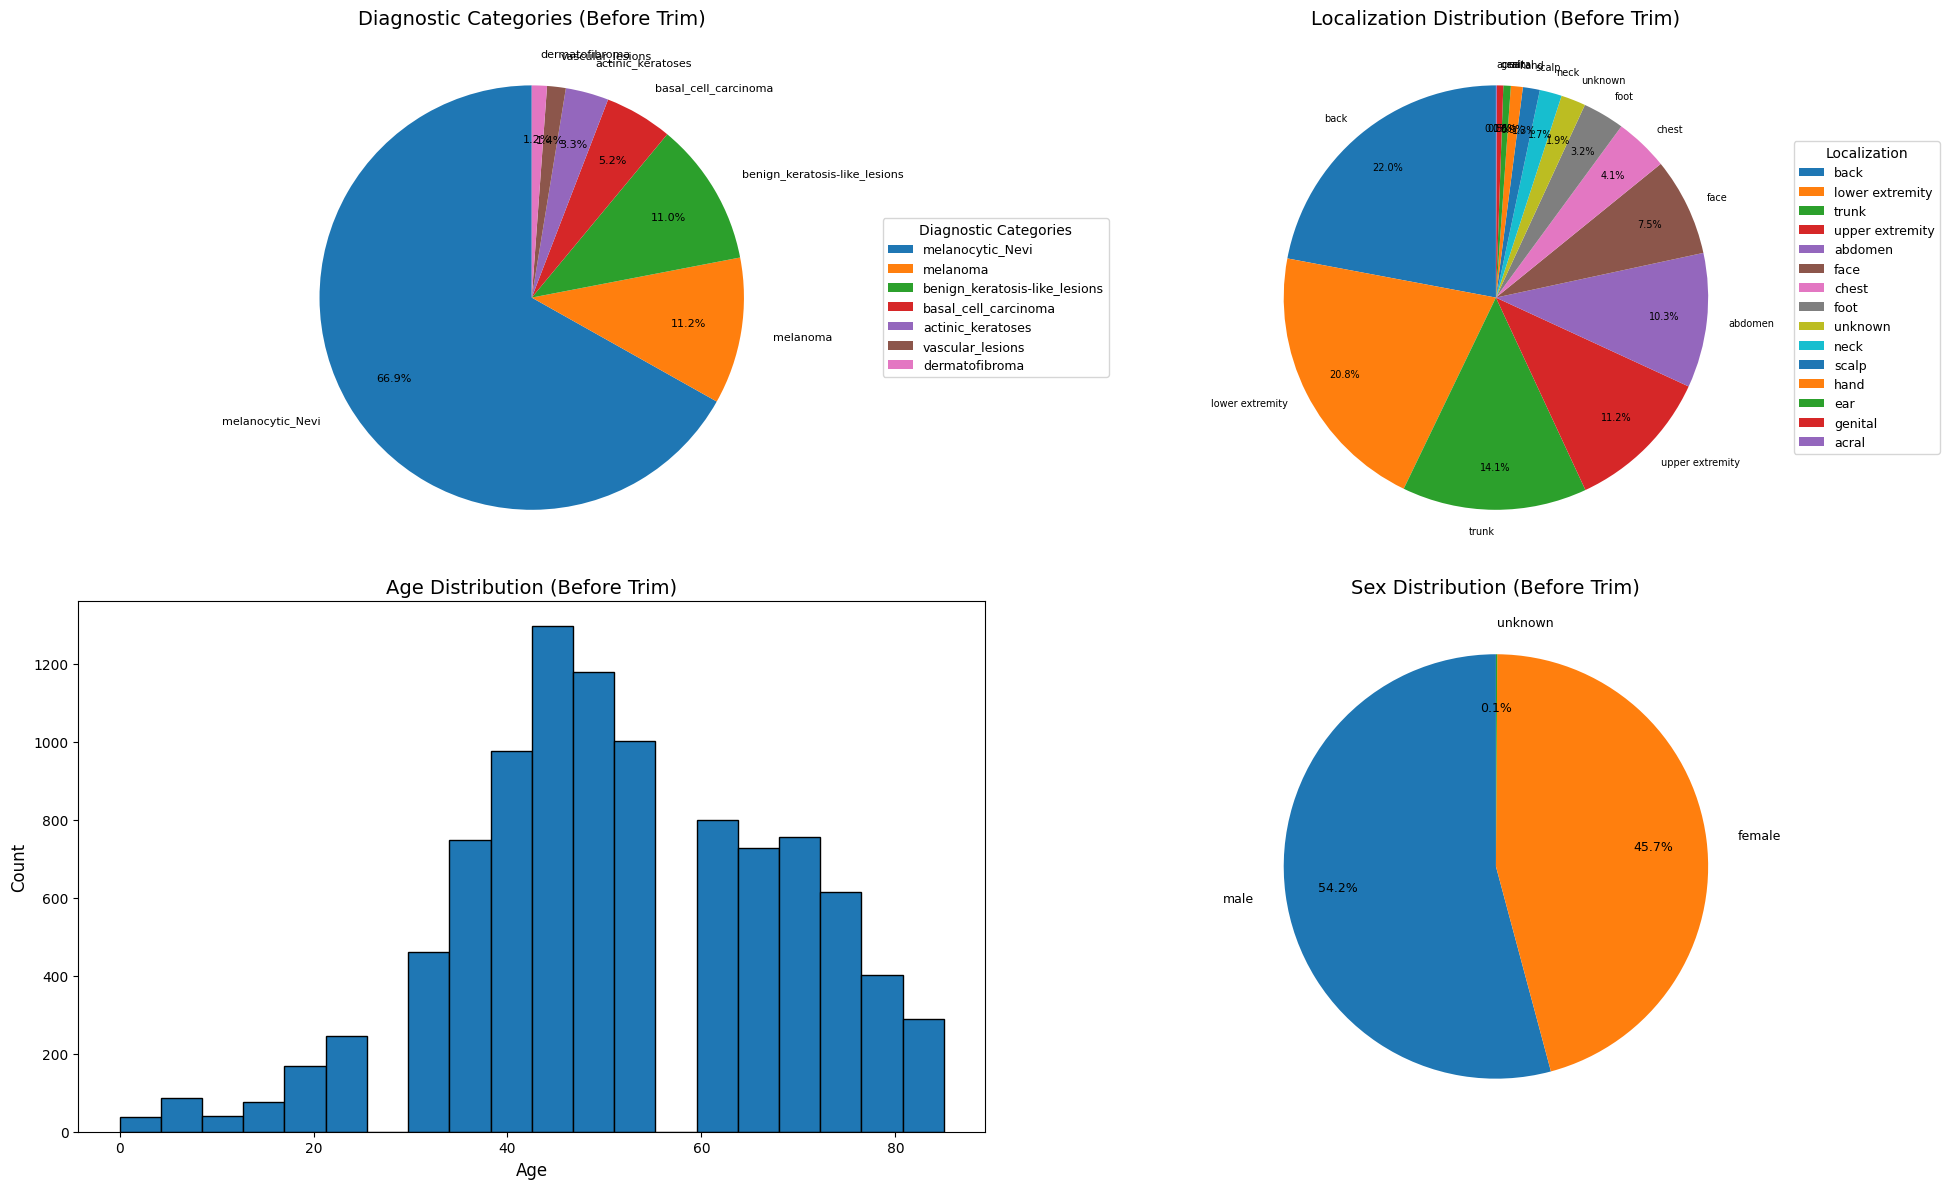

(<Figure size 2000x1200 with 4 Axes>,
 array([[<Axes: title={'center': 'Diagnostic Categories (Before Trim)'}>,
         <Axes: title={'center': 'Localization Distribution (Before Trim)'}>],
        [<Axes: title={'center': 'Age Distribution (Before Trim)'}, xlabel='Age', ylabel='Count'>,
         <Axes: title={'center': 'Sex Distribution (Before Trim)'}>]],
       dtype=object))

In [61]:
skin_df_before = skin_df.copy()

plot_eda_charts(skin_df_before, title_suffix="(Before Trim)")


In [62]:
# Trim data to save resources
sampling_percentage = 0.5
skin_df = skin_df.sample(frac=sampling_percentage, random_state=60)

# Check
print(len(skin_df))

4954


In [63]:
print("AFTER TRIM: Structure")
print(skin_df.info())
print(skin_df.head())

print("AFTER TRIM: Missing Values")
print(skin_df.isna().sum())

print("AFTER TRIM: dx Distribution")
print(skin_df['dx'].value_counts())

print("AFTER TRIM: Sex Distribution")
print(skin_df['sex'].value_counts())

print("AFTER TRIM: Localization Distribution")
print(skin_df['localization'].value_counts())

print("AFTER TRIM: Age Statistics")
print(skin_df['age'].describe())

print("AFTER TRIM: Duplicate Images")
print(skin_df['image'].duplicated().sum())

print("AFTER TRIM: Null Images")
print(skin_df['image'].isna().sum())



AFTER TRIM: Structure
<class 'pandas.core.frame.DataFrame'>
Index: 4954 entries, 1793 to 795
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         4954 non-null   object 
 1   image_id      4954 non-null   object 
 2   lesion_id     4954 non-null   object 
 3   dx            4954 non-null   object 
 4   dx_type       4954 non-null   object 
 5   age           4954 non-null   float64
 6   sex           4954 non-null   object 
 7   localization  4954 non-null   object 
dtypes: float64(1), object(7)
memory usage: 348.3+ KB
None
                                                  image      image_id  \
1793  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0033770   
8062  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0033786   
550   b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0028973   
8409  b'\xff\xd8\xff\xdb\x00C\x00\x01\x01\x01\x01\x0...  ISIC_0024853   
3961  b'\xff\xd8\xff\

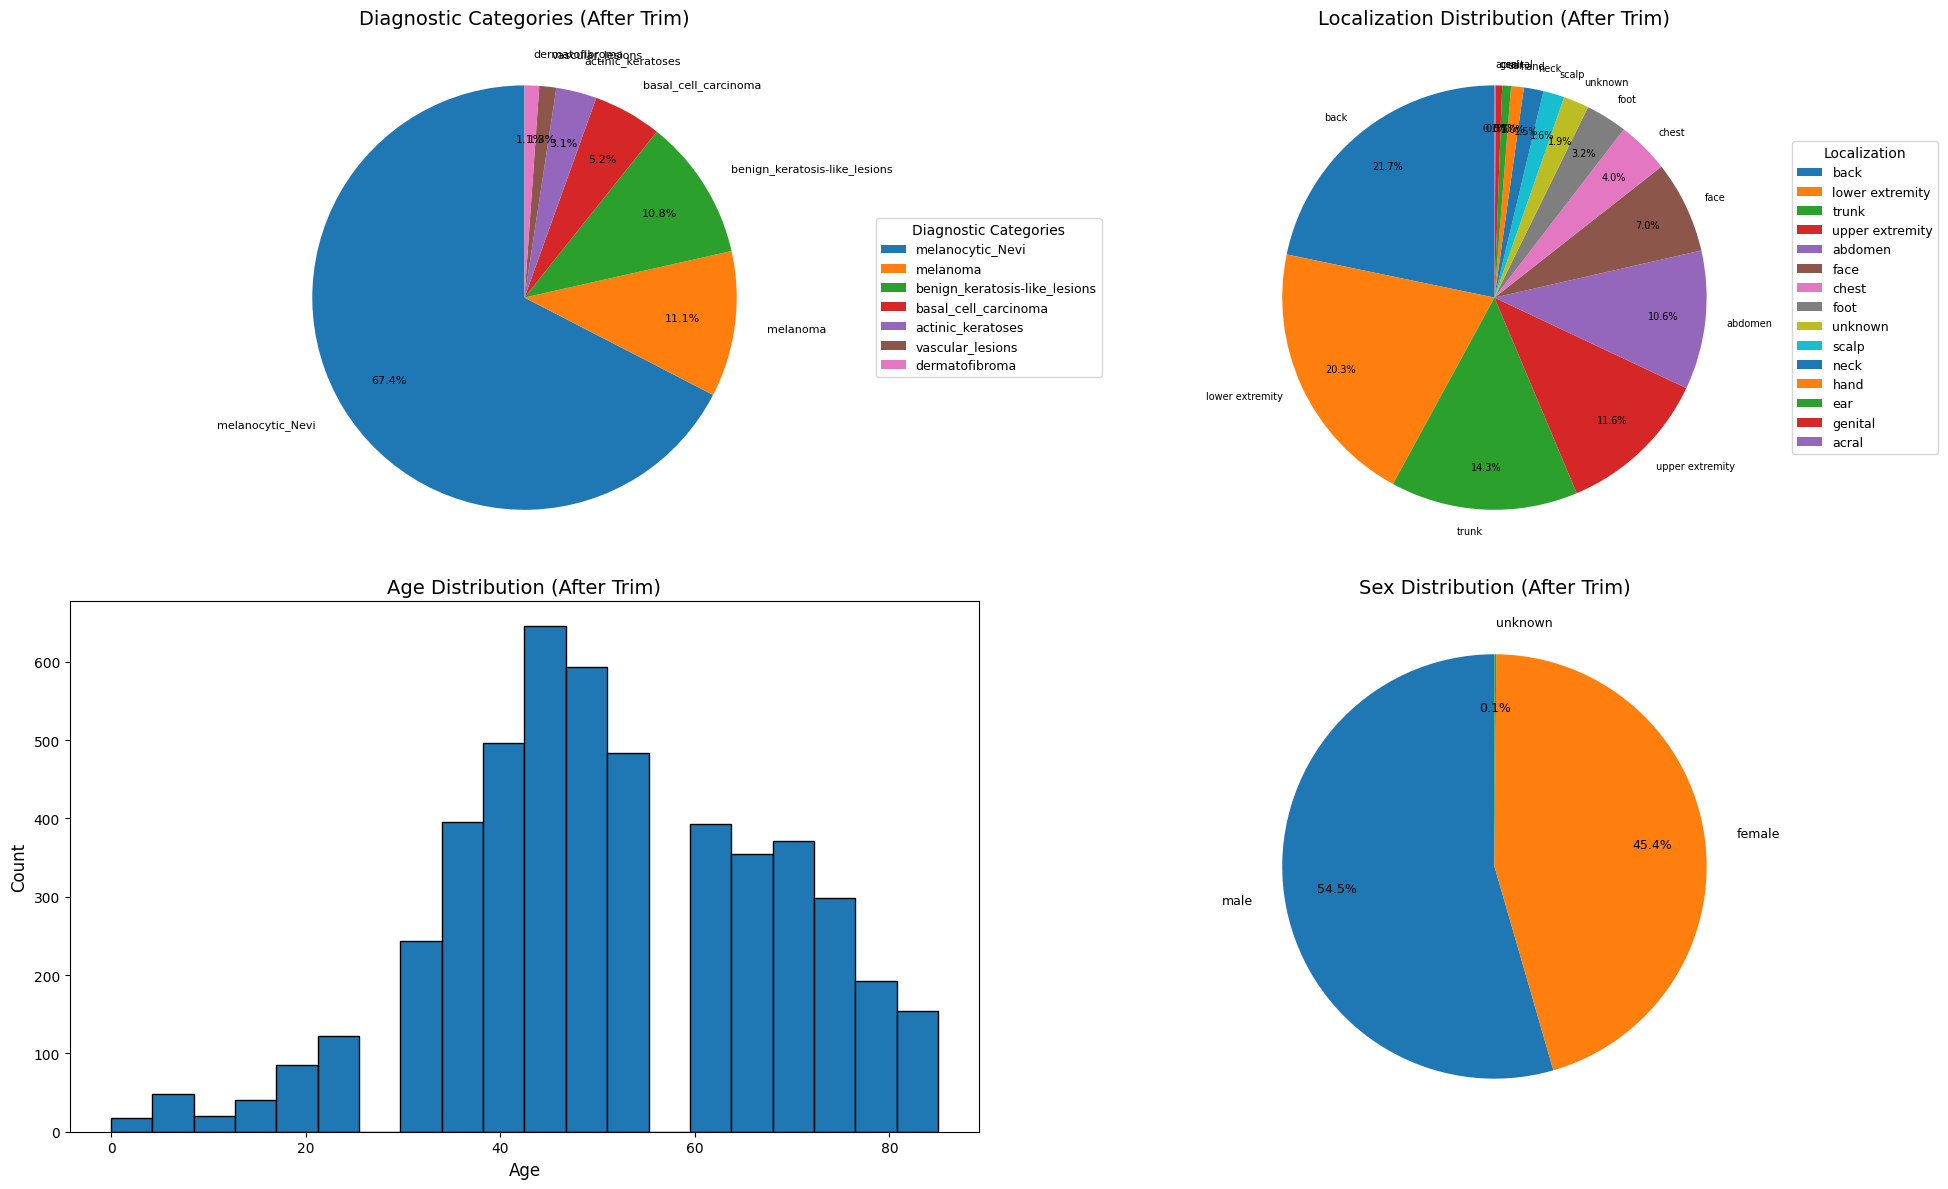

(<Figure size 2000x1200 with 4 Axes>,
 array([[<Axes: title={'center': 'Diagnostic Categories (After Trim)'}>,
         <Axes: title={'center': 'Localization Distribution (After Trim)'}>],
        [<Axes: title={'center': 'Age Distribution (After Trim)'}, xlabel='Age', ylabel='Count'>,
         <Axes: title={'center': 'Sex Distribution (After Trim)'}>]],
       dtype=object))

In [64]:
skin_df_after = skin_df.copy()

plot_eda_charts(skin_df_after, title_suffix="(After Trim)")


In [ ]:
from sklearn.model_selection import train_test_split

# Split feature types and labels
image_df = skin_df["image"]
tabular_df = skin_df[['age', 'sex', 'localization']]
labels_df = skin_df['dx']

# Apply train-test split so feature engineering fitting only occurs on train portion
image_train_df, image_test_df, tabular_train_df, tabular_test_df, labels_train_df, labels_test_df = train_test_split(image_df, tabular_df, labels_df, test_size=0.2, random_state=60)

# Check
print(len(image_train_df))
print(len(image_test_df))
print(len(tabular_train_df))
print(len(tabular_test_df))
print(len(labels_train_df))
print(len(labels_test_df))

3963
991
3963
991
3963
991


In [ ]:
from io import BytesIO
from PIL import Image
import numpy as np

# Convert image bytes data to NumPy for CNN use
def bytes_to_np(bytes_data):
    # Convert bytes to NumPy
    image = Image.open(BytesIO(bytes_data))
    return np.asarray(image)

# Training Set

In [ ]:
skin_train_df["age"].describe()

In [ ]:
from matplotlib import pyplot as plt

plt.figure()
plt.pie(skin_train_df["dx"].value_counts(),
        labels=skin_train_df["dx"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Diagnostic Categories in Training Set")
plt.show()

plt.figure()
plt.pie(skin_train_df["dx_type"].value_counts(),
        labels=skin_train_df["dx_type"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Diagnosis Confirmation Methods in Training Set")
plt.show()

plt.figure()
plt.hist(skin_train_df["age"])
plt.title("Age Distribution in Training Set")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.pie(skin_train_df["sex"].value_counts(),
        labels=skin_train_df["sex"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Sex Distribution in Training Set")
plt.show()

plt.figure()
plt.pie(skin_train_df["localization"].value_counts(),
        labels=skin_train_df["localization"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Localisation Distribution in Training Set")
plt.show()

# Test Set

In [ ]:
skin_test_df["age"].describe()

In [ ]:
plt.figure()
plt.pie(skin_test_df["dx"].value_counts(),
        labels=skin_test_df["dx"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Diagnostic Categories in Test Set")
plt.show()

plt.figure()
plt.pie(skin_test_df["dx_type"].value_counts(),
        labels=skin_test_df["dx_type"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Diagnosis Confirmation Methods in Test Set")
plt.show()

plt.figure()
plt.hist(skin_test_df["age"])
plt.title("Age Distribution in Test Set")
plt.show()

plt.figure()
plt.pie(skin_test_df["sex"].value_counts(),
        labels=skin_test_df["sex"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Sex Distribution in Test Set")
plt.show()

plt.figure()
plt.pie(skin_test_df["localization"].value_counts(),
        labels=skin_test_df["localization"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Localisation Distribution in Test Set")
plt.show()

# Tabular Distribution Among Cancerous Lesions

In [ ]:
cancer_df = pd.concat([skin_train_df[skin_train_df["dx"]=="melanoma"],
                       skin_train_df[skin_train_df["dx"]=="basal_cell_carcinoma"],
                       skin_test_df[skin_test_df["dx"]=="melanoma"],
                       skin_test_df[skin_test_df["dx"]=="basal_cell_carcinoma"]],
                      axis=0)

plt.figure()
plt.pie(cancer_df["dx_type"].value_counts(),
        labels=cancer_df["dx_type"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Diagnosis Confirmation Methods Among Cancerous Lesions")
plt.show()

plt.figure()
plt.hist(cancer_df["age"])
plt.title("Age Distribution Among Cancerous Lesions")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.pie(cancer_df["sex"].value_counts(),
        labels=cancer_df["sex"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Sex Distribution Among Cancerous Lesions")
plt.show()

plt.figure()
plt.pie(cancer_df["localization"].value_counts(),
        labels=cancer_df["localization"].value_counts().index,
        autopct='%1.1f%%')
plt.title("Localisation Distribution Among Cancerous Lesions")
plt.show()

# Sampling Images of Lesion Types

In [ ]:
from IPython.display import Image, display
"""

lesion_types = skin_train_df["dx"].unique()

for lesion in lesion_types:
    sample = skin_train_df[skin_train_df["dx"]==lesion].sample(n=5, random_state=83)
    print("Sample Images of", lesion, "from Training Set")
    for image in sample["image"]:
        print(image)
        display(Image(data=image['bytes']))
"""

In [ ]:
"""
# Try converting to NumPy arrays as CNNs expect
test_row = skin_train_df.sample(n=1, random_state=83)
print(test_row["image"][2552])
print(type(test_row["image"][2552]))
print(test_row["image"][2552]["path"])
bytes_data = test_row["image"][2552]["bytes"]
"""
"""
print(np.array(bytes_data))

from PIL import Image
import io

pil_img = Image.open(io.BytesIO(bytes_data)).convert("RGB")
print(pil_img)

import numpy as np

img_np = np.array(pil_img)
print(img_np)
print(img_np.shape)
"""

In [ ]:
from io import BytesIO
from PIL import Image
import numpy as np

def image_to_np(data_obj):
  """Function to convert image data in DataFrame to NumPy for CNNs"""
  # First get bytes because stored within dictionary in DataFrame
  bytes_data = data_obj["bytes"]
  # Convert bytes to NumPy
  image = Image.open(BytesIO(bytes_data))
  return np.asarray(image)

In [ ]:
lesion_types = skin_train_df["dx"].unique()

for lesion in lesion_types:
    sample = skin_train_df[skin_train_df["dx"]==lesion].sample(n=5, random_state=83)
    print("Sample Images of", lesion, "from Training Set")
    for image in sample["image"]:
        image = image_to_np(image)
        print(image.shape)
        plt.imshow(image)
        plt.show()

In [ ]:
import pickle

# Export test image as NumPy for demo
print(image.shape)
file_to_write = open("test_image_np.data", "wb")
pickle.dump(image, file_to_write)
file_to_write.close()